# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Maurizio Fell

Datum: 17.11.2023

Gruppe: 25

## Forschungsfrage

In diesem Versuch soll das Newtonsche Abkühlungsgestz anhand der Messwerte belegt werden. Deckt sich das Ergebnis des Versuchs mit dem Abkühlungsgesetz?   

## Versuchsaufbau und Durchführung

Ein Becher wird mit heißem Wasser gefüllt. Mit zwei Sensoren misst man nun die Wassertemperatur und die Luft über einen längeren Zeitraum (ca 10min). Aus den Messwerten soll nun der Transportkoeffizient abgeleitet werden, der das Newtonsche Abkühlungsgesetz bestätigt.

<img src="figures/Newton_Versuch.jpeg" width="800">

## Versuchsauswertung

In [2]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz



#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [3]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path = "data/newton/newton.h5"

# DONE #

In [4]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
import json
import h5py
pathsens1 = "data/newton/sensor_1_1ee83a6f-bc37-65e9-89ed-ee6663466c1b.json"
pathsens2 = "data/newton/sensor_2_1ee83a70-66be-62bc-882d-6ad21c723eef.json"
with open(pathsens1) as f1:
    k1 = json.load(f1)
    sens1ID = k1["JSON"]["ID"]
with open(pathsens2) as f2:
    k2 = json.load(f2)
    sens2ID = k2["JSON"]["ID"]
print(sens1ID)
print(sens2ID)
IDlist = [sens1ID, sens2ID]
f3 = h5py.File(path, "r")
templist1 = []
templist2 = []
timelist1 = []
timelist2 = []
for i in IDlist:
    temp = list(f3["RawData"][i]["temperature"])
    time = list(f3["RawData"][i]["timestamp"])
    if i == sens1ID:
        templist1.extend(temp)
        timelist1.extend(time)
    if i == sens2ID:
        templist2.extend(temp)
        timelist2.extend(time)
print(len(templist1))
print(len(templist2))
# DONE #

1ee83a6f-bc37-65e9-89ed-ee6663466c1b
1ee83a70-66be-62bc-882d-6ad21c723eef
560
559


#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

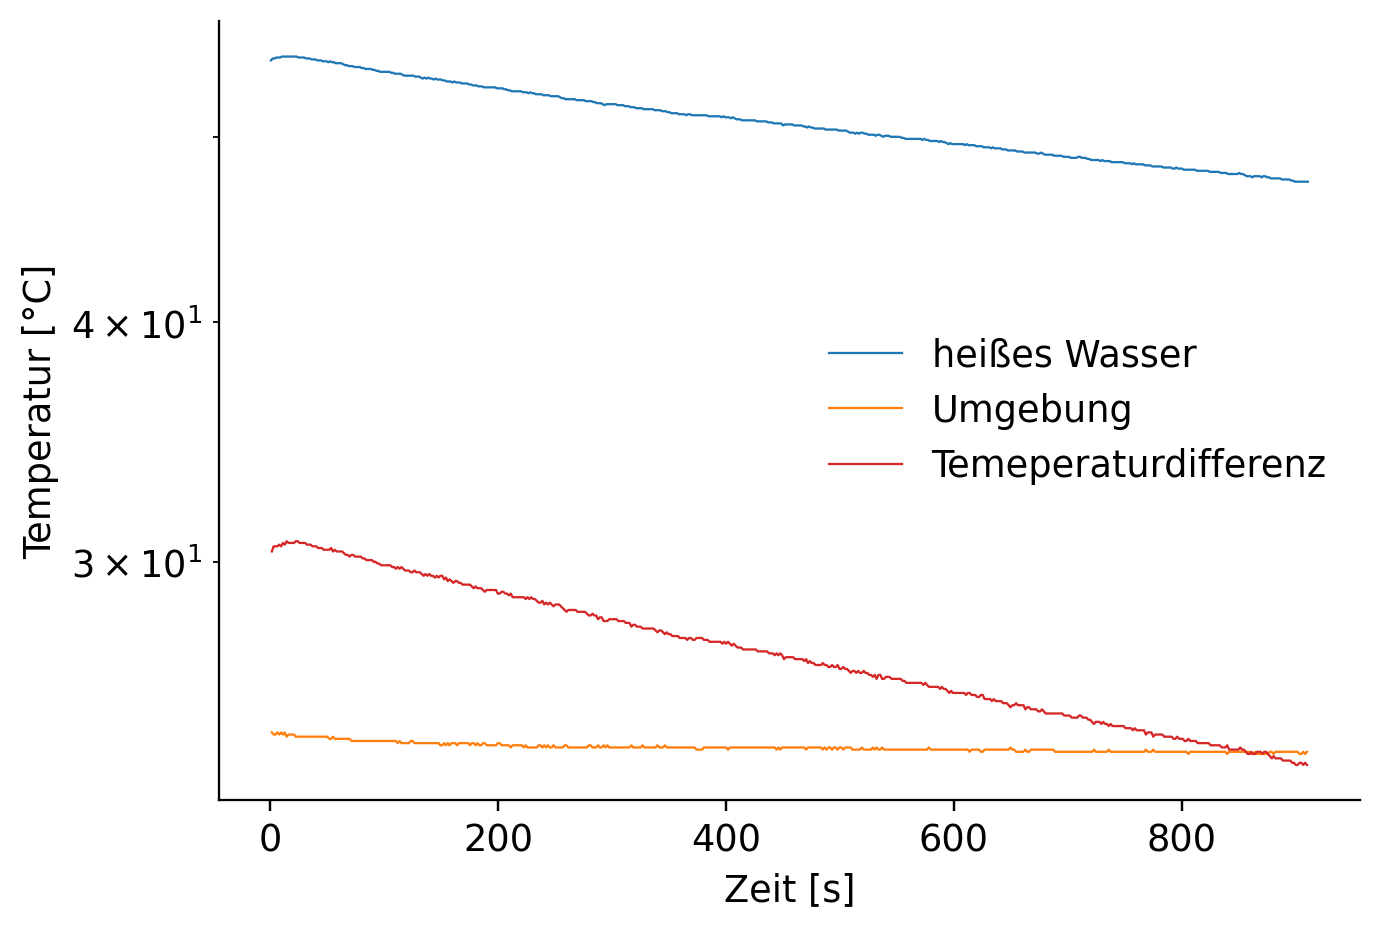

In [6]:
# TODO: Use the temperature and time data for plotting
diff = []
for i in range(559):
    value = templist1[i]-templist2[i]
    diff.append(value)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.yscale("log")
ax.plot(timelist1, templist1, color="tab:blue", label = "heißes Wasser")
ax.plot(timelist2, templist2, color="tab:orange", label = "Umgebung")
ax.plot(timelist2, diff, color = "tab:red", label = "Temeperaturdifferenz")
ax.set_xlabel("Zeit [s]")
ax.set_ylabel("Temperatur [°C]")
ax.legend()
plt.show()
# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [14]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
t1 = max(templist1)
print("t1 = ",t1,"°C")
plus = 0
for i in range(559):
    plus = templist2[i] + plus
t2 = plus/559
print("t2 = " ,t2, "°C")
difflog = np.log(diff)
werte = np.polyfit(timelist2, difflog, 1)
K = werte[0]


# DONE #

t1 =  55.0625 °C
t2 =  24.00134168157424 °C


#### (iV) Ergebnis

In [13]:
# TODO: Print result

print("Koeffizient: ", K ,"1/s")

# DONE #

Koeffizient:  -0.0002978344664542591 1/s


## Diskussion

Die mit dem Koeffizienten über das Newtonsche Abkühlungsgesetz berechneten Temperaturen, sind der Temperaturdifferenz des Graphen ähnlich. Das Newtonsche Abkühlungsgesetz konnte somit bestätigt werden.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.